In [1]:
########## Appendix 1: Q2 ##########


import math
import string
import random
import matplotlib.pyplot as plt
import time


###q2.create the cbf data structure

def create_cbf(n):
    #create a counting bloom filter with size n
    return [0 for x in range(n)]


##hash functions, I use three two hash functions for my cbf
    
def hash_func1(elem,cbf):
    if not isinstance(elem,str): #transform the input into a string if it is not
        elem = str(elem)
    char_sum = 0
    for i in elem:
        char_sum += int((ord(i)**2)+math.sqrt(ord(i))) #sum each character's ascii value with some math operation
    return char_sum % (len(cbf)-1) #mod len(cbf)-1 to accommodate the value within the length of cbf


def hash_func2(elem,cbf):
    if not isinstance(elem,str):
        elem = str(elem)
    char_sum = 0
    anchor = 997 #set an achor 997 (the largest prime number <1000) and use xor computation
    for i in elem:
        xor = anchor ^ ord(i)
        char_sum += xor
    return xor % (len(cbf)-1)

##cbf insertion
    
def insert_cbf(elem,cbf): #simply add 1 to the corresponding slot
    if cbf:
        cbf[hash_func1(elem,cbf)] += 1
        cbf[hash_func2(elem,cbf)] += 1
        

##cbf search

def search_cbf(elem,cbf): #if any of the slot is 0, the input is not in the filter, otherwise it is
    if cbf[hash_func1(elem,cbf)]==0 or cbf[hash_func2(elem,cbf)]==0:
        return False
    else:
        return True
    

##cbf deletion

def delete_cbf(elem,cbf): #minus one to the slot if input found in the filter
    if search_cbf(elem,cbf):
        cbf[hash_func1(elem,cbf)] += -1
        cbf[hash_func2(elem,cbf)] += -1
    else:
        return "Cannot find the item"

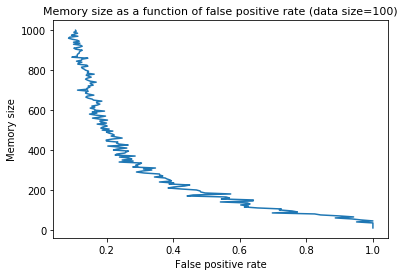

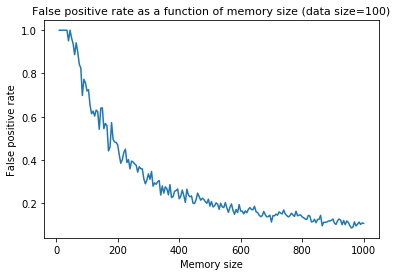

In [2]:
########## Appendix 2: Q3.a ##########


##a. memory size as a function of the false positive rate

n = 100 #fixed data size 100
data = []

#create a dataset of constant size 100
for x in range(n):
    data.append(''.join(random.sample(string.ascii_letters + string.digits,4)))


def fp_test(fixed_data): #false positive rate test
    fp_rate=[]
    for m in range(10,1001,5): #memory size from 10 to 1000
        false_positive_count = 0
        negative_count = 0
        #insert the data in the dataset to the cbf for memory size ranging from 10 to 1000
        cbf = create_cbf(m)
        for i in fixed_data:
            insert_cbf(i,cbf)
        for j in range(1000): #run for 1000 times to take average
            search = ''.join(random.sample(string.ascii_letters + string.digits,4)) #generate a random input
            search_result = search_cbf(search,cbf) #search for the input
            if not (search in fixed_data): #if input does not belong to the filter
                negative_count+=1 #that means we have a negative count, either false positive or true negative
                if search_result==True: #then, if the search result is true, this is a false positive
                    false_positive_count+=1
        fp_rate.append(false_positive_count/negative_count) 
        #fp rate is fp_count/total negatives (fp + true negative)
    return fp_rate

fp_rates = fp_test(data)
memory_size = [m for m in range(10,1001,5)]

#plot data
plt.plot(fp_rates,memory_size)
plt.xlabel("False positive rate")
plt.ylabel("Memory size")
plt.title("Memory size as a function of false positive rate (data size=100)",fontsize=11)
plt.show()

plt.plot(memory_size,fp_rates)
plt.ylabel("False positive rate")
plt.xlabel("Memory size")
plt.title("False positive rate as a function of memory size (data size=100)",fontsize=11)
plt.show()

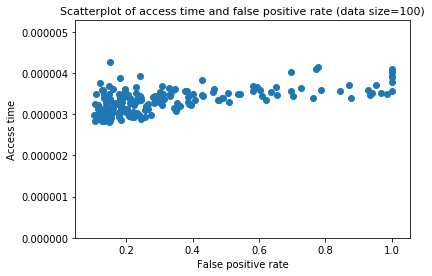

In [3]:
########## Appendix 3: Q3.c ##########


##c. access time as a function of the false positive rate

data2=[]

#create a dataset of constant size 100
for x in range(100):
    data2.append(''.join(random.sample(string.ascii_letters + string.digits,4)))

fp_rate2=[]
access_time=[]

#similar to the implementation in appendix 2
for m in range(10,1001,5):
    false_positive_count = 0
    negative_count = 0
    cbf = create_cbf(m)
    tot_time=0
    for i in data2:
        insert_cbf(i,cbf)
    for j in range(1000):
        search = ''.join(random.sample(string.ascii_letters + string.digits,4))
        time1=time.time() #get the system time1
        search_result = search_cbf(search,cbf) #access (search)
        time2=time.time() #get the system time 2
        tot_time += (time2-time1) #subtract to find the access time
        if not (search in data2):
            negative_count += 1
            if search_result==True:
                false_positive_count+=1
    fp_rate2.append(false_positive_count/negative_count)
    access_time.append(tot_time/1000)

#plot the data
plt.scatter(x=fp_rate2, y=access_time)
plt.ylim((0,max(access_time)+0.000001))
plt.ylabel("Access time")
plt.xlabel("False positive rate")
plt.title("Scatterplot of access time and false positive rate (data size=100)",fontsize=11)
plt.show()

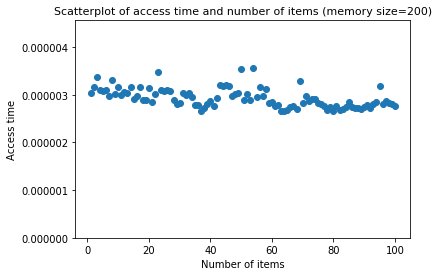

In [4]:
########## Appendix 4: Q3.d ##########


##d. access time as a function of the number of items stored

data3=[]

#create a dataset of constant size 100
for x in range(100):
    data3.append(''.join(random.sample(string.ascii_letters + string.digits,4)))

#similar to the implementation in appendix 3
access_time2=[]
cbf2 = create_cbf(200)
for i in data3:
    tot_time2=0
    insert_cbf(i,cbf)
    for j in range(1000):
        search = ''.join(random.sample(string.ascii_letters + string.digits,4))
        t1=time.time()
        search_result = search_cbf(search,cbf2)
        t2=time.time()
        tot_time2 += (t2-t1)
    access_time2.append(tot_time2/1000)

size=[i for i in range(1,101)]

#plot
plt.scatter(x=size, y=access_time2)
plt.ylim((0,max(access_time2)+0.000001))
plt.ylabel("Access time")
plt.xlabel("Number of items")
plt.title("Scatterplot of access time and number of items (memory size=200)",fontsize=11)
plt.show()

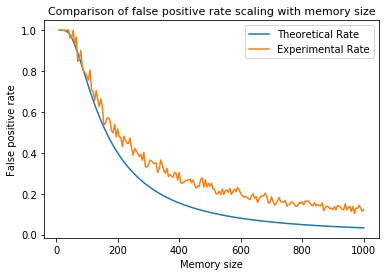

In [5]:
########## Appendix 5: Q4 ##########


###false positive rate comparison

##experimental fp rate (same as appendix 2)
n = 100
data = []

for x in range(n):
    data.append(''.join(random.sample(string.ascii_letters + string.digits,4)))


def fp_test(fixed_data):
    fp_rate=[]
    for m in range(10,1001,5):
        false_positive_count = 0
        negative_count = 0
        #insert the data in the dataset to the cbf for memory size ranging from 10 to 1000
        cbf = create_cbf(m)
        for i in fixed_data:
            insert_cbf(i,cbf)
        for j in range(1000):
            search = ''.join(random.sample(string.ascii_letters + string.digits,4))
            search_result = search_cbf(search,cbf)
            if not (search in fixed_data):
                negative_count+=1
                if search_result==True:
                    false_positive_count+=1
        fp_rate.append(false_positive_count/negative_count)
    return fp_rate

fp_rates = fp_test(data)
memory_size = [m for m in range(10,1001,5)]


##theoretical fp rate
h=2
num_item=100
theo_rate=[]

for i in memory_size:
    theo_rate.append((1-math.exp(-h*num_item/i))**h) #use the formula to calculate theoretical rate

#plot the comparison
plt.plot(memory_size,theo_rate,label='Theoretical Rate')
plt.plot(memory_size,fp_rates,label='Experimental Rate')
plt.legend(loc='upper right')
plt.ylabel("False positive rate")
plt.xlabel("Memory size")
plt.title("Comparison of false positive rate scaling with memory size",fontsize=11)
plt.show()